# Кредитный скоринг

In [1]:
import pandas as pd
import numpy as np
import pylab as plt


data = pd.read_csv('german_credit_data.csv', index_col=0)

data[:10]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [2]:
# Основные характеристики числовых признаков
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [3]:
data.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


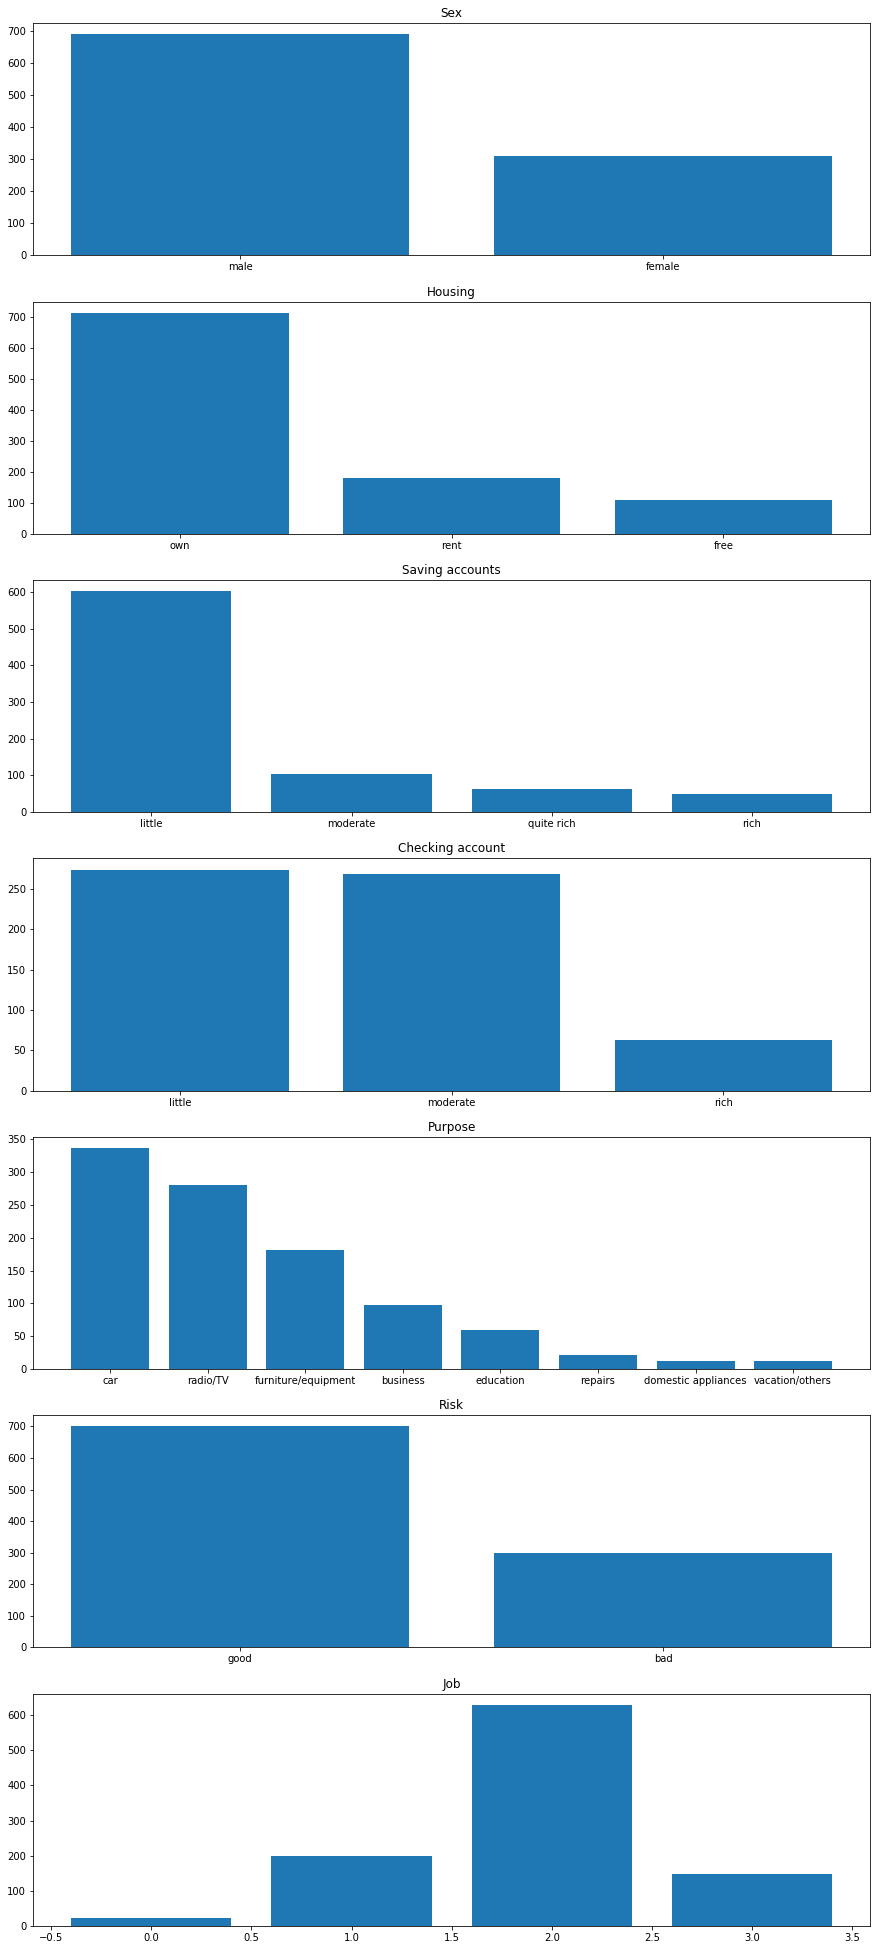

In [4]:
categorial_features = ['Sex','Housing','Saving accounts','Checking account','Purpose','Risk', 'Job']

fig, axes = plt.subplots(nrows=len(categorial_features), ncols=1, figsize=(15, 35))

for i, categorial_feature in enumerate(categorial_features):
    data_to_plot = data[categorial_feature].value_counts()
    axes[i].set_title(categorial_feature)
    axes[i].bar(data_to_plot.index, data_to_plot)

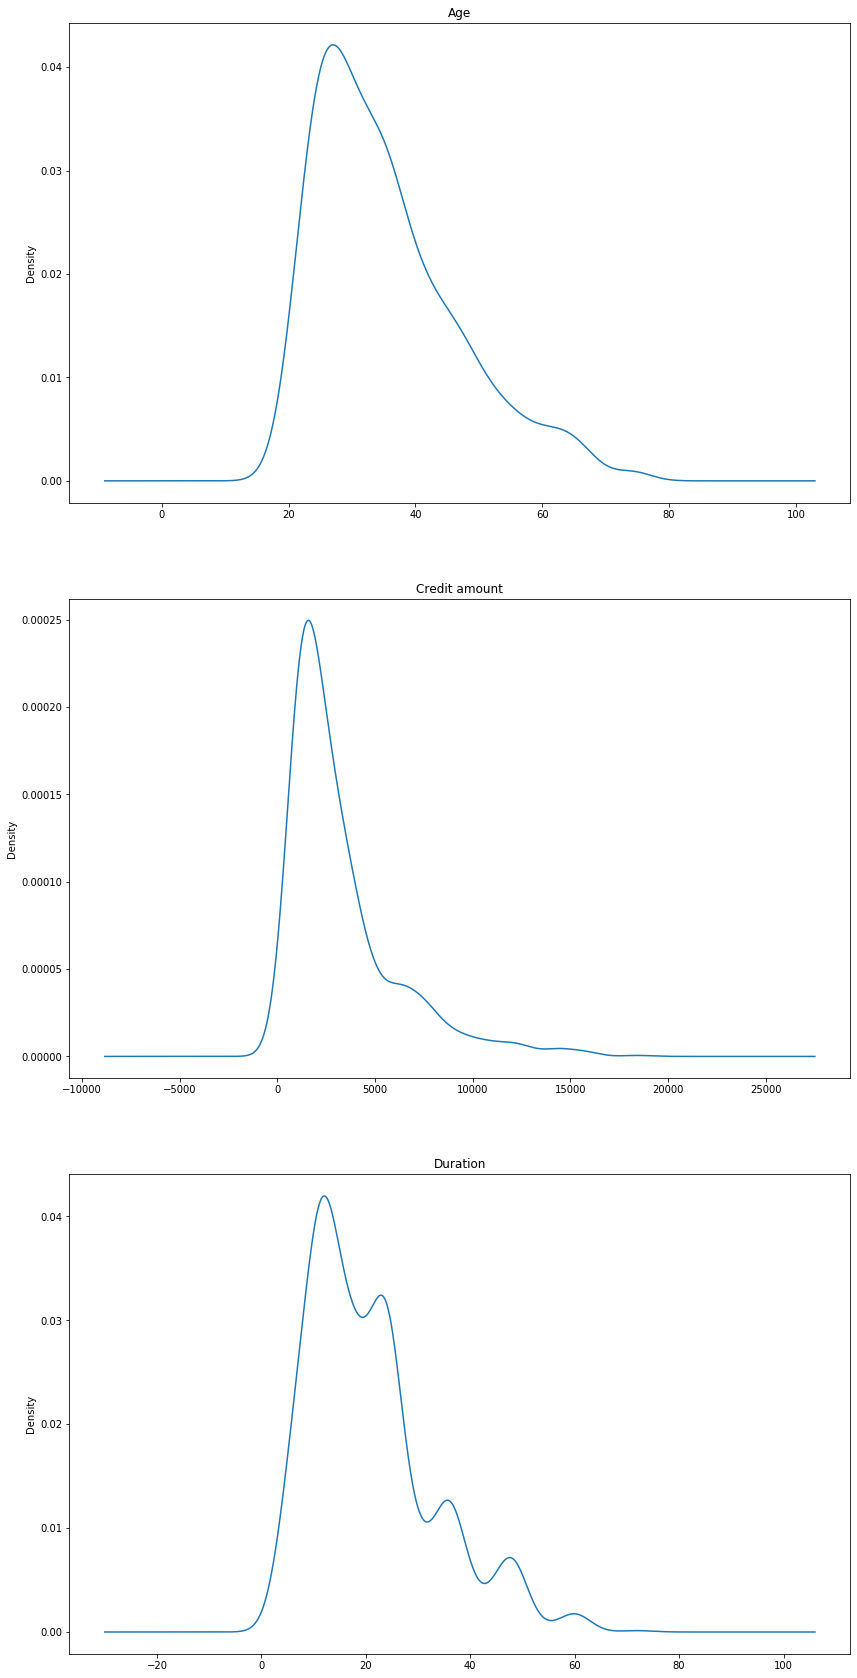

In [5]:
numeric_features = ['Age', 'Credit amount', 'Duration']

fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(14, 30))

for i, numeric_feature in enumerate(numeric_features):
    axes[i].set_title(numeric_feature)
    data[numeric_feature].plot.kde(ax=axes[i])

# Определение позитивных, нейтральных инегативных твитов

In [8]:
data = pd.read_csv('Tweets.csv', index_col=0, usecols=['tweet_id', 'airline_sentiment', 'text'])

data[:10]

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials t...
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
570300616901320704,positive,"@VirginAmerica yes, nearly every time I fly VX..."
570300248553349120,neutral,@VirginAmerica Really missed a prime opportuni...
570299953286942721,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"


In [15]:
text_column = data['text'].values

Общее количество слов в датасете: 247795


,Word,NumOfOccurrences,Frequency
14086,usairways,3053,0.012321
9248,my,3288,0.013269
2281,and,3733,0.015065
9815,on,3815,0.015396
6004,flight,3939,0.015896
6157,for,3999,0.016138
13914,united,4164,0.016804
14944,you,4401,0.017761
13120,the,6061,0.024460
13326,to,8652,0.034916


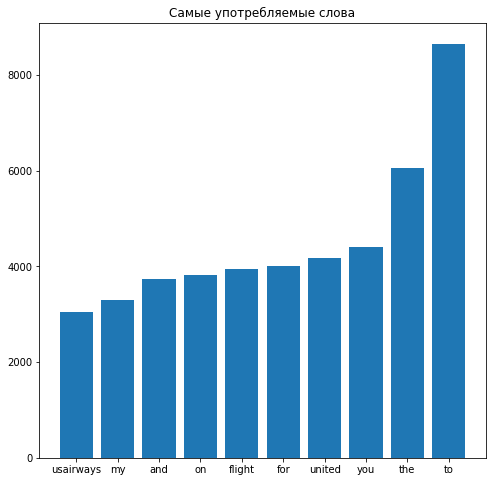

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_column)

matrix_freq = np.asarray(X.sum(axis=0)).ravel()
sum_of_words = matrix_freq.sum()

print('Общее количество слов в датасете:', sum_of_words)

word_freq = pd.DataFrame()
word_freq['Word'] = pd.Series(vectorizer.get_feature_names())
word_freq['NumOfOccurrences'] = pd.Series(matrix_freq)
word_freq['Frequency'] = pd.Series(matrix_freq / sum_of_words)

top_10 = word_freq.sort_values(by='NumOfOccurrences')[-10:]

plt.figure(0, figsize=(8,8))
plt.bar(top_10['Word'], top_10['NumOfOccurrences'])
plt.title('Самые употребляемые слова')

top_10